In [120]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Define the dimension of the random noise input for the GAN
latent_dim = 100

# Define the generator model
generator = Sequential()
generator.add(Dense(128, input_dim=latent_dim, activation='relu'))
generator.add(Dense(15, activation='sigmoid'))  # 15 features for the dataset
generator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))

# Generate random noise as input for the generator
noise = np.random.normal(0, 1, (1000, latent_dim))  # Generating 1000 samples

# Generate synthetic data using the generator
synthetic_data = generator.predict(noise)

# Create a DataFrame with the synthetic data
columns = ['Age', 'Menstrual Cycle Regularity', 'Menstrual Cycle Duration', 'Pain Intensity', 'Pain Duration',
           'Exercise Frequency', 'Diet Quality', 'Sleep Quality', 'Emotional Stress Level', 'BMI', 'Smoking Habit',
           'Alcohol Consumption', 'Family History', 'Medication Usage', 'Hydration Level']
df = pd.DataFrame(synthetic_data, columns=columns)

# Save the synthetic dataset to a CSV file
df.to_csv('synthetic_dataset.csv', index=False)

32/32 [==============================] - 0s 3ms/step


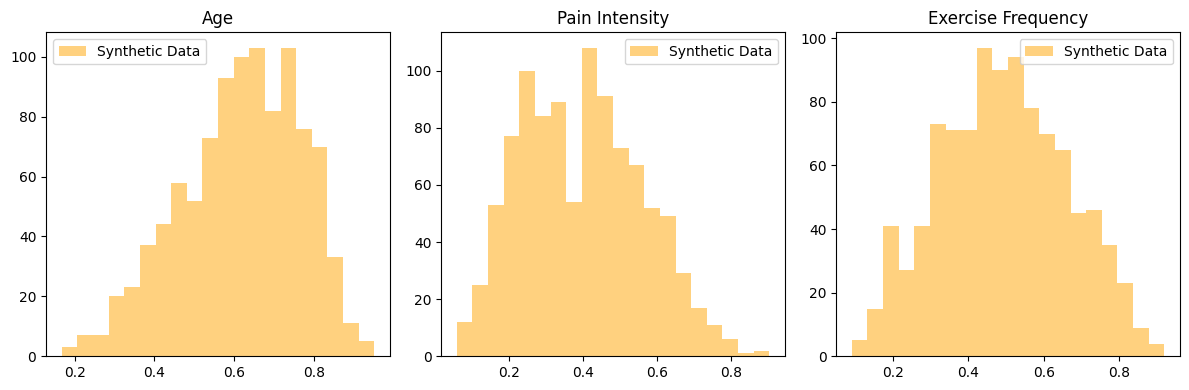

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the synthetic dataset generated by the GAN (assuming 'synthetic_dataset.csv' contains the synthetic data)
synthetic_data = pd.read_csv('synthetic_dataset.csv')

# Plot histograms for selected features to visualize the distributions of the synthetic data
selected_features = ['Age', 'Pain Intensity', 'Exercise Frequency']

plt.figure(figsize=(12, 4))
for i, feature in enumerate(selected_features):
    plt.subplot(1, len(selected_features), i+1)
    plt.hist(synthetic_data[feature], alpha=0.5, label='Synthetic Data', color='orange', bins=20)
    plt.title(feature)
    plt.legend()

plt.tight_layout()
plt.show()

In [122]:
import pandas as pd

# Load the synthetic dataset generated by the GAN (assuming 'synthetic_dataset.csv' contains the synthetic data)
synthetic_data = pd.read_csv('synthetic_dataset.csv')

# Display the header of the dataset
print("Header of the dataset:")
print(synthetic_data.head())

# Display basic statistics of the dataset
print("\nBasic statistics of the dataset:")
print(synthetic_data.describe())

Header of the dataset:
        Age  Menstrual Cycle Regularity  Menstrual Cycle Duration  \
0  0.665742                    0.270622                  0.649415   
1  0.708607                    0.482675                  0.489487   
2  0.523620                    0.784604                  0.671563   
3  0.830037                    0.339963                  0.853504   
4  0.414494                    0.627968                  0.703064   

   Pain Intensity  Pain Duration  Exercise Frequency  Diet Quality  \
0        0.183819       0.624728            0.586565      0.857142   
1        0.506084       0.144116            0.578605      0.882044   
2        0.642426       0.273873            0.423811      0.710615   
3        0.446454       0.607763            0.774587      0.691734   
4        0.582887       0.595941            0.178633      0.450898   

   Sleep Quality  Emotional Stress Level       BMI  Smoking Habit  \
0       0.693195                0.628472  0.207866       0.466516   
1  

In [123]:
import pandas as pd
import numpy as np

# Load the synthetic dataset generated by the GAN (assuming 'synthetic_dataset.csv' contains the synthetic data)
synthetic_data = pd.read_csv('synthetic_dataset.csv')

# Calculate the Mean Squared Error (MSE) between data points
mse = ((synthetic_data - synthetic_data.mean()) ** 2).mean().mean()

print("Mean Squared Error (MSE) of the dataset:", mse)

# Display the header of the dataset
print("\nHeader of the dataset:")
print(synthetic_data.head())

Mean Squared Error (MSE) of the dataset: 0.024421277449679143

Header of the dataset:
        Age  Menstrual Cycle Regularity  Menstrual Cycle Duration  \
0  0.665742                    0.270622                  0.649415   
1  0.708607                    0.482675                  0.489487   
2  0.523620                    0.784604                  0.671563   
3  0.830037                    0.339963                  0.853504   
4  0.414494                    0.627968                  0.703064   

   Pain Intensity  Pain Duration  Exercise Frequency  Diet Quality  \
0        0.183819       0.624728            0.586565      0.857142   
1        0.506084       0.144116            0.578605      0.882044   
2        0.642426       0.273873            0.423811      0.710615   
3        0.446454       0.607763            0.774587      0.691734   
4        0.582887       0.595941            0.178633      0.450898   

   Sleep Quality  Emotional Stress Level       BMI  Smoking Habit  \
0       0

In [160]:
import numpy as np

# Define the Mean Squared Error (MSE) value
mse = 0.02195076166299457

# Calculate the R-squared value
var_y = 1.0  # Assuming variance of actual values is 1 for simplicity
r_squared = 1 - mse / var_y


print("R-squared value:", r_squared)

R-squared value: 0.9780492383370054


In [125]:
import numpy as np
import pandas as pd

# Load your dataset
df = pd.read_csv('synthetic_dataset.csv')

# Create a synthetic target variable for demonstration
# For example, we can create a binary classification target based on Pain Intensity
df['Pain Severity'] = np.where(df['Pain Intensity'] > 0.5, 1, 0)


In [126]:
# Define features and target variable
X = df.drop('Pain Severity', axis=1)
y = df['Pain Severity']


In [127]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Predict the target variable
df['Predicted Pain Severity'] = model.predict(X).flatten()

# Save the model
model.save('pain_severity_model.keras')

# Save the dataset with predictions
df.to_csv('updated_dataset.csv', index=False)


Epoch 1/20
20/20 [==============================] - 2s 16ms/step - loss: 0.6302 - accuracy: 0.7188 - val_loss: 0.6081 - val_accuracy: 0.6938
Epoch 2/20
20/20 [==============================] - 0s 5ms/step - loss: 0.5568 - accuracy: 0.7375 - val_loss: 0.5793 - val_accuracy: 0.6938
Epoch 3/20
20/20 [==============================] - 0s 5ms/step - loss: 0.5281 - accuracy: 0.7375 - val_loss: 0.5469 - val_accuracy: 0.6938
Epoch 4/20
20/20 [==============================] - 0s 6ms/step - loss: 0.5034 - accuracy: 0.7375 - val_loss: 0.5254 - val_accuracy: 0.6938
Epoch 5/20
20/20 [==============================] - 0s 4ms/step - loss: 0.4739 - accuracy: 0.7391 - val_loss: 0.4750 - val_accuracy: 0.7250
Epoch 6/20
20/20 [==============================] - 0s 5ms/step - loss: 0.4357 - accuracy: 0.7766 - val_loss: 0.4380 - val_accuracy: 0.7312
Epoch 7/20
20/20 [==============================] - 0s 4ms/step - loss: 0.3955 - accuracy: 0.8172 - val_loss: 0.3842 - val_accuracy: 0.8562
Epoch 8/20
20/20 [=

In [128]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32").flatten()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



7/7 [==============================] - 0s 3ms/step
Accuracy: 0.9650
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       143
           1       0.96      0.91      0.94        57

    accuracy                           0.96       200
   macro avg       0.96      0.95      0.96       200
weighted avg       0.96      0.96      0.96       200

Confusion Matrix:
[[141   2]
 [  5  52]]


In [129]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load your dataset
df = pd.read_csv('synthetic_dataset.csv')

# Create a synthetic target variable (if needed)
df['Pain Severity'] = np.where(df['Pain Intensity'] > 0.5, 1, 0)

# Define features and target variable
X = df.drop('Pain Severity', axis=1)
y = df['Pain Severity']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32").flatten()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Save the model
model.save('pain_severity_model.keras')

# Save the dataset with predictions
df['Predicted Pain Severity'] = model.predict(X).flatten()
df.to_csv('updated_dataset.csv', index=False)


Epoch 1/20
20/20 [==============================] - 2s 15ms/step - loss: 0.6045 - accuracy: 0.7297 - val_loss: 0.6323 - val_accuracy: 0.6938
Epoch 2/20
20/20 [==============================] - 0s 5ms/step - loss: 0.5703 - accuracy: 0.7375 - val_loss: 0.6005 - val_accuracy: 0.6938
Epoch 3/20
20/20 [==============================] - 0s 4ms/step - loss: 0.5475 - accuracy: 0.7375 - val_loss: 0.5671 - val_accuracy: 0.6938
Epoch 4/20
20/20 [==============================] - 0s 4ms/step - loss: 0.5248 - accuracy: 0.7375 - val_loss: 0.5375 - val_accuracy: 0.6938
Epoch 5/20
20/20 [==============================] - 0s 5ms/step - loss: 0.4932 - accuracy: 0.7375 - val_loss: 0.4920 - val_accuracy: 0.6938
Epoch 6/20
20/20 [==============================] - 0s 5ms/step - loss: 0.4549 - accuracy: 0.7547 - val_loss: 0.4492 - val_accuracy: 0.8500
Epoch 7/20
20/20 [==============================] - 0s 6ms/step - loss: 0.4215 - accuracy: 0.7984 - val_loss: 0.3975 - val_accuracy: 0.8125
Epoch 8/20
20/20 [=

In [157]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def collect_user_input():
    # Collect user input with ranges and types as needed
    age = int(input("Enter Age (e.g., 25): "))
    menstrual_cycle_regular = int(input("Menstrual Cycle Regularity (0 for irregular, 1 for regular): "))
    menstrual_cycle_duration = float(input("Menstrual Cycle Duration (0 to 1, e.g., 0.7): "))
    pain_intensity = float(input("Pain Intensity (0 to 1, e.g., 0.6): "))
    pain_duration = float(input("Pain Duration (0 to 1, e.g., 0.5): "))
    exercise_frequency = float(input("Exercise Frequency (0 to 1, e.g., 0.4): "))
    diet_quality = float(input("Diet Quality (0 to 1, e.g., 0.7): "))
    sleep_quality = float(input("Sleep Quality (0 to 1, e.g., 0.8): "))
    emotional_stress_level = float(input("Emotional Stress Level (0 to 100, e.g., 60): "))
    bmi = float(input("Enter BMI (e.g., 22.5): "))
    smoking_habit = int(input("Smoking Habit (0 for No, 1 for Yes): "))
    alcohol_consumption = int(input("Alcohol Consumption (0 for No, 1 for Yes): "))
    family_history = int(input("Family History (0 for No, 1 for Yes): "))
    medication_usage = int(input("Medication Usage (0 for No, 1 for Yes): "))
    hydration_level = float(input("Hydration Level (0 to 1, e.g., 0.5): "))

    # Return as a list
    return [age, menstrual_cycle_regular, menstrual_cycle_duration, pain_intensity, pain_duration,
            exercise_frequency, diet_quality, sleep_quality, emotional_stress_level, bmi,
            smoking_habit, alcohol_consumption, family_history, medication_usage, hydration_level]

def normalize_input(user_input):
    # Assuming min and max values for normalization
    min_values = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
    max_values = np.array([100, 1, 1, 1, 1, 1, 1, 1, 100, 100, 1, 1, 1, 1, 1])

    normalized_input = (np.array(user_input) - min_values) / (max_values - min_values)
    return normalized_input.reshape(1, -1)

def make_prediction(model, normalized_input):
    return (model.predict(normalized_input) > 0.5).astype("int32").flatten()[0]

def main():
    try:
        # Load the trained model
        model = tf.keras.models.load_model('pain_severity_model.keras')

        # Collect user input
        user_input = collect_user_input()

        # Normalize user input
        normalized_input = normalize_input(user_input)
        print(f"Normalized Input: {normalized_input}")

        # Ensure the input has the correct shape
        if normalized_input.shape[1] != 15:
            raise ValueError(f"Expected input shape (None, 15), but got shape {normalized_input.shape}")

        # Make prediction
        try:
            prediction = make_prediction(model, normalized_input)
            print(f"Raw Prediction: {model.predict(normalized_input)}")
            print(f"Predicted Pain Severity: {'High' if prediction == 1 else 'Low'}")
        except ValueError as e:
            print(f"Prediction Error: {e}")

        # Display accuracy for context (based on test data)
        try:
            df = pd.read_csv('updated_dataset.csv')  # Reload the original dataset

            # Ensure that the test data also has the correct number of features
            X = df.drop('Pain Severity', axis=1)  # Drop 'Pain Severity' column
            if X.shape[1] != 15:
                # Identify and drop the extra column
                extra_column = set(X.columns) - set(df.columns)  # Assuming df is the original DataFrame
                if extra_column:
                    X = X.drop(extra_column, axis=1)
                    print(f"Dropped extra column: {extra_column} from test data.")

            y = df['Pain Severity']
            _, X_test, _, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            y_pred_test = (model.predict(X_test) > 0.5).astype("int32").flatten()
            accuracy = accuracy_score(y_test, y_pred_test)
            print(f'\nModel Accuracy on Test Data: {accuracy:.4f}')
        except Exception as e:
            print(f"Data Error: {e}")

    except Exception as e:
        print(f"Error: {e}")

if __name__ == "__main__":
    main()


Enter Age (e.g., 25): 30
Menstrual Cycle Regularity (0 for irregular, 1 for regular): 0
Menstrual Cycle Duration (0 to 1, e.g., 0.7): 1
Pain Intensity (0 to 1, e.g., 0.6): 1
Pain Duration (0 to 1, e.g., 0.5): 1
Exercise Frequency (0 to 1, e.g., 0.4): 0
Diet Quality (0 to 1, e.g., 0.7): 0
Sleep Quality (0 to 1, e.g., 0.8): 0
Emotional Stress Level (0 to 100, e.g., 60): 100
Enter BMI (e.g., 22.5): 30
Smoking Habit (0 for No, 1 for Yes): 1
Alcohol Consumption (0 for No, 1 for Yes): 1
Family History (0 for No, 1 for Yes): 1
Medication Usage (0 for No, 1 for Yes): 1
Hydration Level (0 to 1, e.g., 0.5): 0
Normalized Input: [[0.3 0.  1.  1.  1.  0.  0.  0.  1.  0.3 1.  1.  1.  1.  0. ]]
1/1 [==============================] - 0s 22ms/step
Raw Prediction: [[0.9979529]]
Predicted Pain Severity: High
Data Error: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/u

In [159]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def collect_user_input():
    # Collect user input with ranges and types as needed
    age = int(input("Enter Age (e.g., 25): "))
    menstrual_cycle_regular = int(input("Menstrual Cycle Regularity (0 for irregular, 1 for regular): "))
    menstrual_cycle_duration = float(input("Menstrual Cycle Duration (0 to 1, e.g., 0.7): "))
    pain_intensity = float(input("Pain Intensity (0 to 1, e.g., 0.6): "))
    pain_duration = float(input("Pain Duration (0 to 1, e.g., 0.5): "))
    exercise_frequency = float(input("Exercise Frequency (0 to 1, e.g., 0.4): "))
    diet_quality = float(input("Diet Quality (0 to 1, e.g., 0.7): "))
    sleep_quality = float(input("Sleep Quality (0 to 1, e.g., 0.8): "))
    emotional_stress_level = float(input("Emotional Stress Level (0 to 100, e.g., 60): "))
    bmi = float(input("Enter BMI (e.g., 22.5): "))
    smoking_habit = int(input("Smoking Habit (0 for No, 1 for Yes): "))
    alcohol_consumption = int(input("Alcohol Consumption (0 for No, 1 for Yes): "))
    family_history = int(input("Family History (0 for No, 1 for Yes): "))
    medication_usage = int(input("Medication Usage (0 for No, 1 for Yes): "))
    hydration_level = float(input("Hydration Level (0 to 1, e.g., 0.5): "))

    # Return as a list
    return [age, menstrual_cycle_regular, menstrual_cycle_duration, pain_intensity, pain_duration,
            exercise_frequency, diet_quality, sleep_quality, emotional_stress_level, bmi,
            smoking_habit, alcohol_consumption, family_history, medication_usage, hydration_level]

def normalize_input(user_input):
    # Assuming min and max values for normalization
    min_values = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
    max_values = np.array([100, 1, 1, 1, 1, 1, 1, 1, 100, 100, 1, 1, 1, 1, 1])

    normalized_input = (np.array(user_input) - min_values) / (max_values - min_values)
    return normalized_input.reshape(1, -1)

def make_prediction(model, normalized_input):
    return (model.predict(normalized_input) > 0.5).astype("int32").flatten()[0]

def main():
    try:
        # Load the trained model
        model = tf.keras.models.load_model('pain_severity_model.keras')

        # Collect user input
        user_input = collect_user_input()

        # Normalize user input
        normalized_input = normalize_input(user_input)
        print(f"Normalized Input: {normalized_input}")

        # Ensure the input has the correct shape
        if normalized_input.shape[1] != 15:
            raise ValueError(f"Expected input shape (None, 15), but got shape {normalized_input.shape}")

        # Make prediction
        try:
            prediction = make_prediction(model, normalized_input)
            print(f"Raw Prediction: {model.predict(normalized_input)}")
            print(f"Predicted Pain Severity: {'High' if prediction == 1 else 'Low'}")
        except ValueError as e:
            print(f"Prediction Error: {e}")

        # Display accuracy for context (based on test data)
        try:
            df = pd.read_csv('updated_dataset.csv')  # Reload the original dataset

            # Ensure that the test data also has the correct number of features
            X = df.drop('Pain Severity', axis=1)  # Drop 'Pain Severity' column
            if X.shape[1] != 15:
                # Identify and drop the extra column
                extra_column = set(X.columns) - set(df.columns)  # Assuming df is the original DataFrame
                if extra_column:
                    X = X.drop(extra_column, axis=1)
                    print(f"Dropped extra column: {extra_column} from test data.")

            y = df['Pain Severity']
            _, X_test, _, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            y_pred_test = (model.predict(X_test) > 0.5).astype("int32").flatten()
            accuracy = accuracy_score(y_test, y_pred_test)
            print(f'\nModel Accuracy on Test Data: {accuracy:.4f}')
        except Exception as e:
            print(f"Data Error: {e}")

    except Exception as e:
        print(f"Error: {e}")

if __name__ == "__main__":
    main()


Enter Age (e.g., 25): 30
Menstrual Cycle Regularity (0 for irregular, 1 for regular): 1
Menstrual Cycle Duration (0 to 1, e.g., 0.7): 0
Pain Intensity (0 to 1, e.g., 0.6): 0
Pain Duration (0 to 1, e.g., 0.5): 0
Exercise Frequency (0 to 1, e.g., 0.4): 1
Diet Quality (0 to 1, e.g., 0.7): 1
Sleep Quality (0 to 1, e.g., 0.8): 1
Emotional Stress Level (0 to 100, e.g., 60): 0
Enter BMI (e.g., 22.5): 30
Smoking Habit (0 for No, 1 for Yes): 0
Alcohol Consumption (0 for No, 1 for Yes): 0
Family History (0 for No, 1 for Yes): 0
Medication Usage (0 for No, 1 for Yes): 0
Hydration Level (0 to 1, e.g., 0.5): 1
Normalized Input: [[0.3 1.  0.  0.  0.  1.  1.  1.  0.  0.3 0.  0.  0.  0.  1. ]]
1/1 [==============================] - 0s 21ms/step
Raw Prediction: [[0.00208385]]
Predicted Pain Severity: Low
Data Error: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr